<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/circadian_period_q10_for_cyano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input data
    Temperature  Period
0          25.6    23.1
1          26.4    22.8
2          26.8    22.5
3          27.4    22.0
4          27.6    22.0
5          28.1    21.8
6          28.6    21.2
7          29.1    21.0
8          29.6    20.7
9          29.8    20.6
10         30.5    20.6
11         30.6    20.4
12         30.8    20.4
13         31.0    20.2
14         31.1    20.0
15         31.4    19.7
16         31.6    19.9
17         31.7    19.6
18         31.8    19.7
19         32.0    19.1
20         32.4    19.2
21         32.7    19.1
22         33.0    18.9
23         33.5    18.8
24         33.8    18.7
25         34.1    18.5
26         34.3    18.1
27         34.9    18.5
28         35.4    17.9 

Minimum temperature = 25.600 °C
Maximum temperature = 35.400 °C
Average temperature = 30.883 °C
Median temperature  = 31.100 °C

Minimum period = 17.900 h
Maximum period = 23.100 h
Average period = 20.172 h
Median period  = 20.000 h

Data used for Q10 calculation
   

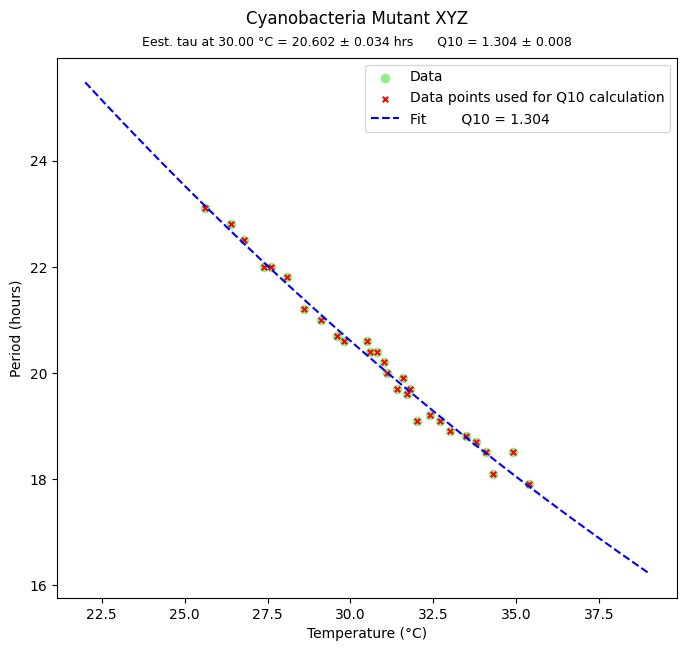

In [5]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator for circadian period
import numpy as np
import statistics
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

#@markdown For usage, see [GitHub repository page](https://github.com/dxda6216/q10).

#@markdown Input data, then hit **Runtime** -> **Run all** (or press **Ctrl+F9**).

# Data description (plot title)
Data_description = "Cyanobacteria Mutant XYZ" #@param {type:"string"}

# Temperature data
Temperatures = 25.6, 26.4, 26.8, 27.4, 27.6, 28.1, 28.6, 29.1, 29.6, 29.8, 30.5, 30.6, 30.8, 31, 31.1, 31.4, 31.6, 31.7, 31.8, 32, 32.4, 32.7, 33, 33.5, 33.8, 34.1, 34.3, 34.9, 35.4 #@param {type:"raw"}
x = np.array(Temperatures)

# Period data
Periods =  23.1, 22.8, 22.5, 22, 22, 21.8, 21.2, 21, 20.7, 20.6, 20.6, 20.4, 20.4, 20.2, 20, 19.7, 19.9, 19.6, 19.7, 19.1, 19.2, 19.1, 18.9, 18.8, 18.7, 18.5, 18.1, 18.5, 17.9 #@param {type:"raw"}
y = np.array(Periods)

median_x = statistics.median(x)
maximum_x = np.max(x)
minimum_x = np.min(x)
average_x = statistics.mean(x)
median_y = statistics.median(y)
maximum_y = np.max(y)
minimum_y = np.min(y)
average_y = statistics.mean(y)

# Creating Pandas dataframe (df) for the input data
tp = {'Temperature': x, 'Period': y}
df = pd.DataFrame(data=tp)
## Printing data
print("Input data")
print(df, "\n")
print(u'Minimum temperature =', '{:.3f}'.format(minimum_x), u'\u00B0C')
print(u'Maximum temperature =', '{:.3f}'.format(maximum_x), u'\u00B0C')
print(u'Average temperature =', '{:.3f}'.format(average_x), u'\u00B0C')
print(u'Median temperature  =', '{:.3f}'.format(median_x), u'\u00B0C\n')
print(u'Minimum period =', '{:.3f}'.format(minimum_y), u'h')
print(u'Maximum period =', '{:.3f}'.format(maximum_y), u'h')
print(u'Average period =', '{:.3f}'.format(average_y), u'h')
print(u'Median period  =', '{:.3f}'.format(median_y), u'h\n')

# Calculation Q10 from the data within a specific temperature range
#@markdown Only data within a specific temperature range to be used for Q10 calculation? (Yes or No)
Set_temperature_range = "No" #@param ["Yes (set lowest and highest limits by sliders below)", "No"]
Range_low_limit = 20 # @param {type:"slider", min:0, max:60, step:0.1}
Range_high_limit = 50 # @param {type:"slider", min:0, max:60, step:0.1}

## Creating a new dataframe (dfa) for a data set within the temperature range
if Set_temperature_range == "No":
	dfa = df
else:
	if Range_low_limit < Range_high_limit:
		dfa = df[(df['Temperature'] >= Range_low_limit) & (df['Temperature'] <= Range_high_limit)]
	else:
		dfa = df

xa = dfa['Temperature']
ya = dfa['Period']
median_xa = statistics.median(xa)
maximum_xa = np.max(xa)
minimum_xa = np.min(xa)
average_xa = statistics.mean(xa)
median_ya = statistics.median(ya)
maximum_ya = np.max(ya)
minimum_ya = np.min(ya)
average_ya = statistics.mean(ya)

## Printing the data set for Q10 calculation
print("Data used for Q10 calculation")
print(dfa, "\n")
print(u'Minimum temperature =', '{:.3f}'.format(minimum_xa), u'\u00B0C')
print(u'Maximum temperature =', '{:.3f}'.format(maximum_xa), u'\u00B0C')
print(u'Average temperature =', '{:.3f}'.format(average_xa), u'\u00B0C')
print(u'Median temperature  =', '{:.3f}'.format(median_xa), u'\u00B0C\n')
print(u'Minimum period =', '{:.3f}'.format(minimum_ya), u'h')
print(u'Maximum period =', '{:.3f}'.format(maximum_ya), u'h')
print(u'Average period =', '{:.3f}'.format(average_ya), u'h')
print(u'Median period  =', '{:.3f}'.format(median_ya), u'h\n')

# Base temperature
#@markdown Setting base temperature
Select_base_temperature = "30°C" #@param ["-273.15\u00B0C (absolute zero)", "0\u00B0C", "4\u00B0C", "25\u00B0C", "30\u00B0C", "37\u00B0C", "100\u00B0C", "Minimum", "Maximum", "Average", "Median", "Set \"Base_temperature\" by slider below"]
Base_temperature = 0 # @param {type:"slider", min:0, max:100, step:0.1}

if Select_base_temperature == "-273.15\u00B0C (absolute zero)":
	base_t = -273.15

if Select_base_temperature == "0\u00B0C":
	base_t = 0.000

if Select_base_temperature == "4\u00B0C":
	base_t = 4.000

if Select_base_temperature == "25\u00B0C":
	base_t = 25.000

if Select_base_temperature == "30\u00B0C":
	base_t = 30.000

if Select_base_temperature == "37\u00B0C":
	base_t = 37.000

if Select_base_temperature == "100\u00B0C":
	base_t = 100.000

if Select_base_temperature == "Minimum":
	base_t = minimum_xa

if Select_base_temperature == "Maximum":
	base_t = maximum_xa

if Select_base_temperature == "Average":
	base_t = average_xa

if Select_base_temperature == "Median":
	base_t = median_xa

if Select_base_temperature == "Set \"Base_temperature\" by slider below":
	base_t = Base_temperature

# Displaying Tab-delimited data Yes or No
#@markdown Displaying tab-delimited data? (Yes or No)
Display_tab_delimited_data = "No" #@param ["Yes", "No"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau_bt : period at base median temperature (degree Celsius)
#     q10 : temperature coefficient (Q10)
# def func(xa, tau_bt, q10):
# 	return tau_bt / ( q10 ** ( ( xa - base_t ) * 0.1 ) )

def func(xa, tau_bt, q10):
	return tau_bt * q10 ** ( ( base_t - xa ) * 0.1 )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, xa, ya, p0)
residuals = ya - func(xa, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((ya-np.mean(ya))**2)
r_squared = 1 - ( ss_residuals / ss_total )

# Setting up fig
fig = plt.figure(figsize = (8,6))
fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.333 )
fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.333 ) + 1
fcx = np.linspace(fcxmin, fcxmax, 200)

plt.scatter(x, y, marker='o', s=35, color ='lightgreen', label ='Data')
plt.scatter(xa, ya, marker='x', s=15, color ='red', label ='Data points used for Q10 calculation')

fcy = func(fcx, popt[0], popt[1])
plt.plot(fcx, fcy, '--', color='blue', label ='Fit        Q10 = %5.3f' %popt[1])
### plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

# Displaying tab delimited data
if Display_tab_delimited_data == "Yes":
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for fcxseq in fcx:
		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
		fcycount += 1
	print(u'\n')

# Printing the results
print(u'Eestimated period length at', '{:.2f}'.format(base_t), u'\u00B0C =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5), 'hours')
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))
print(u'R\u00B2 =', '{:.6f}'.format(r_squared), u'\n')

# Adjustment of plot location
plt.subplots_adjust(top=0.9, bottom=0.0)

# Fig title, header, footer
fig.suptitle(Data_description, fontsize=12)
fst = 'Eest. tau at ' + '{:.2f}'.format(base_t) + ' \u00B0C = ' + '{:.3f}'.format(popt[0]) + ' \u00B1 ' + '{:.3f}'.format(pcov[0,0]**0.5) + ' hrs      Q10 = ' + '{:.3f}'.format(popt[1]) + ' \u00B1 ' + '{:.3f}'.format(pcov[1,1]**0.5)
fig.text(0.5, 0.92, fst, horizontalalignment="center", fontsize=9)
### fig.text(0.5, 0.015, "text", horizontalalignment="center", fontsize=9)
plt.legend()

# Showing fig
plt.show()

### End of script